Attribute Information:

Only 14 attributes used: 
1. age : Patient age in years
2. sex : sex (1 = male; 0 = female)
3. cp : cp: chest pain type 
                -- Value 1: typical angina 
                -- Value 2: atypical angina 
                -- Value 3: non-anginal pain 
                -- Value 4: asymptomatic
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital) 
5. chol : serum cholestoral in mg/dl 
6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : resting electrocardiographic results 
                -- Value 0: normal 
                -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
                -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach :  maximum heart rate achieved 
9. exang : exercise induced angina (1 = yes; 0 = no) 
10. oldpeak : ST depression induced by exercise relative to rest 
11. slope : the slope of the peak exercise ST segment 
               -- Value 1: upsloping 
               -- Value 2: flat 
               -- Value 3: downsloping 
12. ca : number of major vessels (0-3) colored by flourosopy 
13. thal :  3 = normal; 6 = fixed defect; 7 = reversable defect 
14. num (the predicted attribute) : diagnosis of heart disease (angiographic disease status) 
           -- Value 0: < 50% diameter narrowing 
           -- Value 1: > 50% diameter narrowing 



# Libraries Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings("ignore")



['heart.csv']


In [2]:
df = pd.read_csv('../input/heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# **E.D.A. (Exploratory Data Analysis)**

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


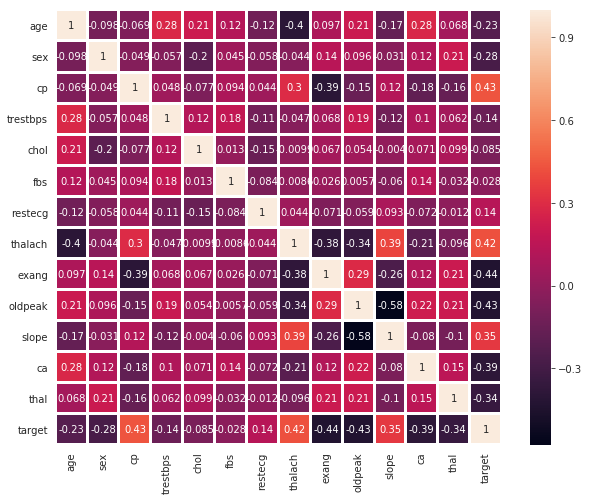

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=2,)

Text(0.5,0,'-ve Heart Diagnosis                   +ve Heart Diagnosis')

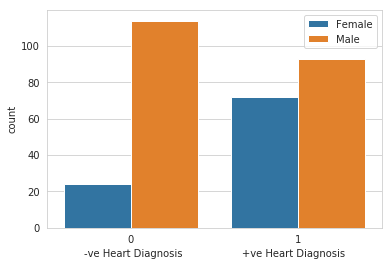

In [8]:
sns.countplot(x='target',data=df,hue='sex')
plt.legend(['Female','Male'])
plt.xlabel('-ve Heart Diagnosis                   +ve Heart Diagnosis')

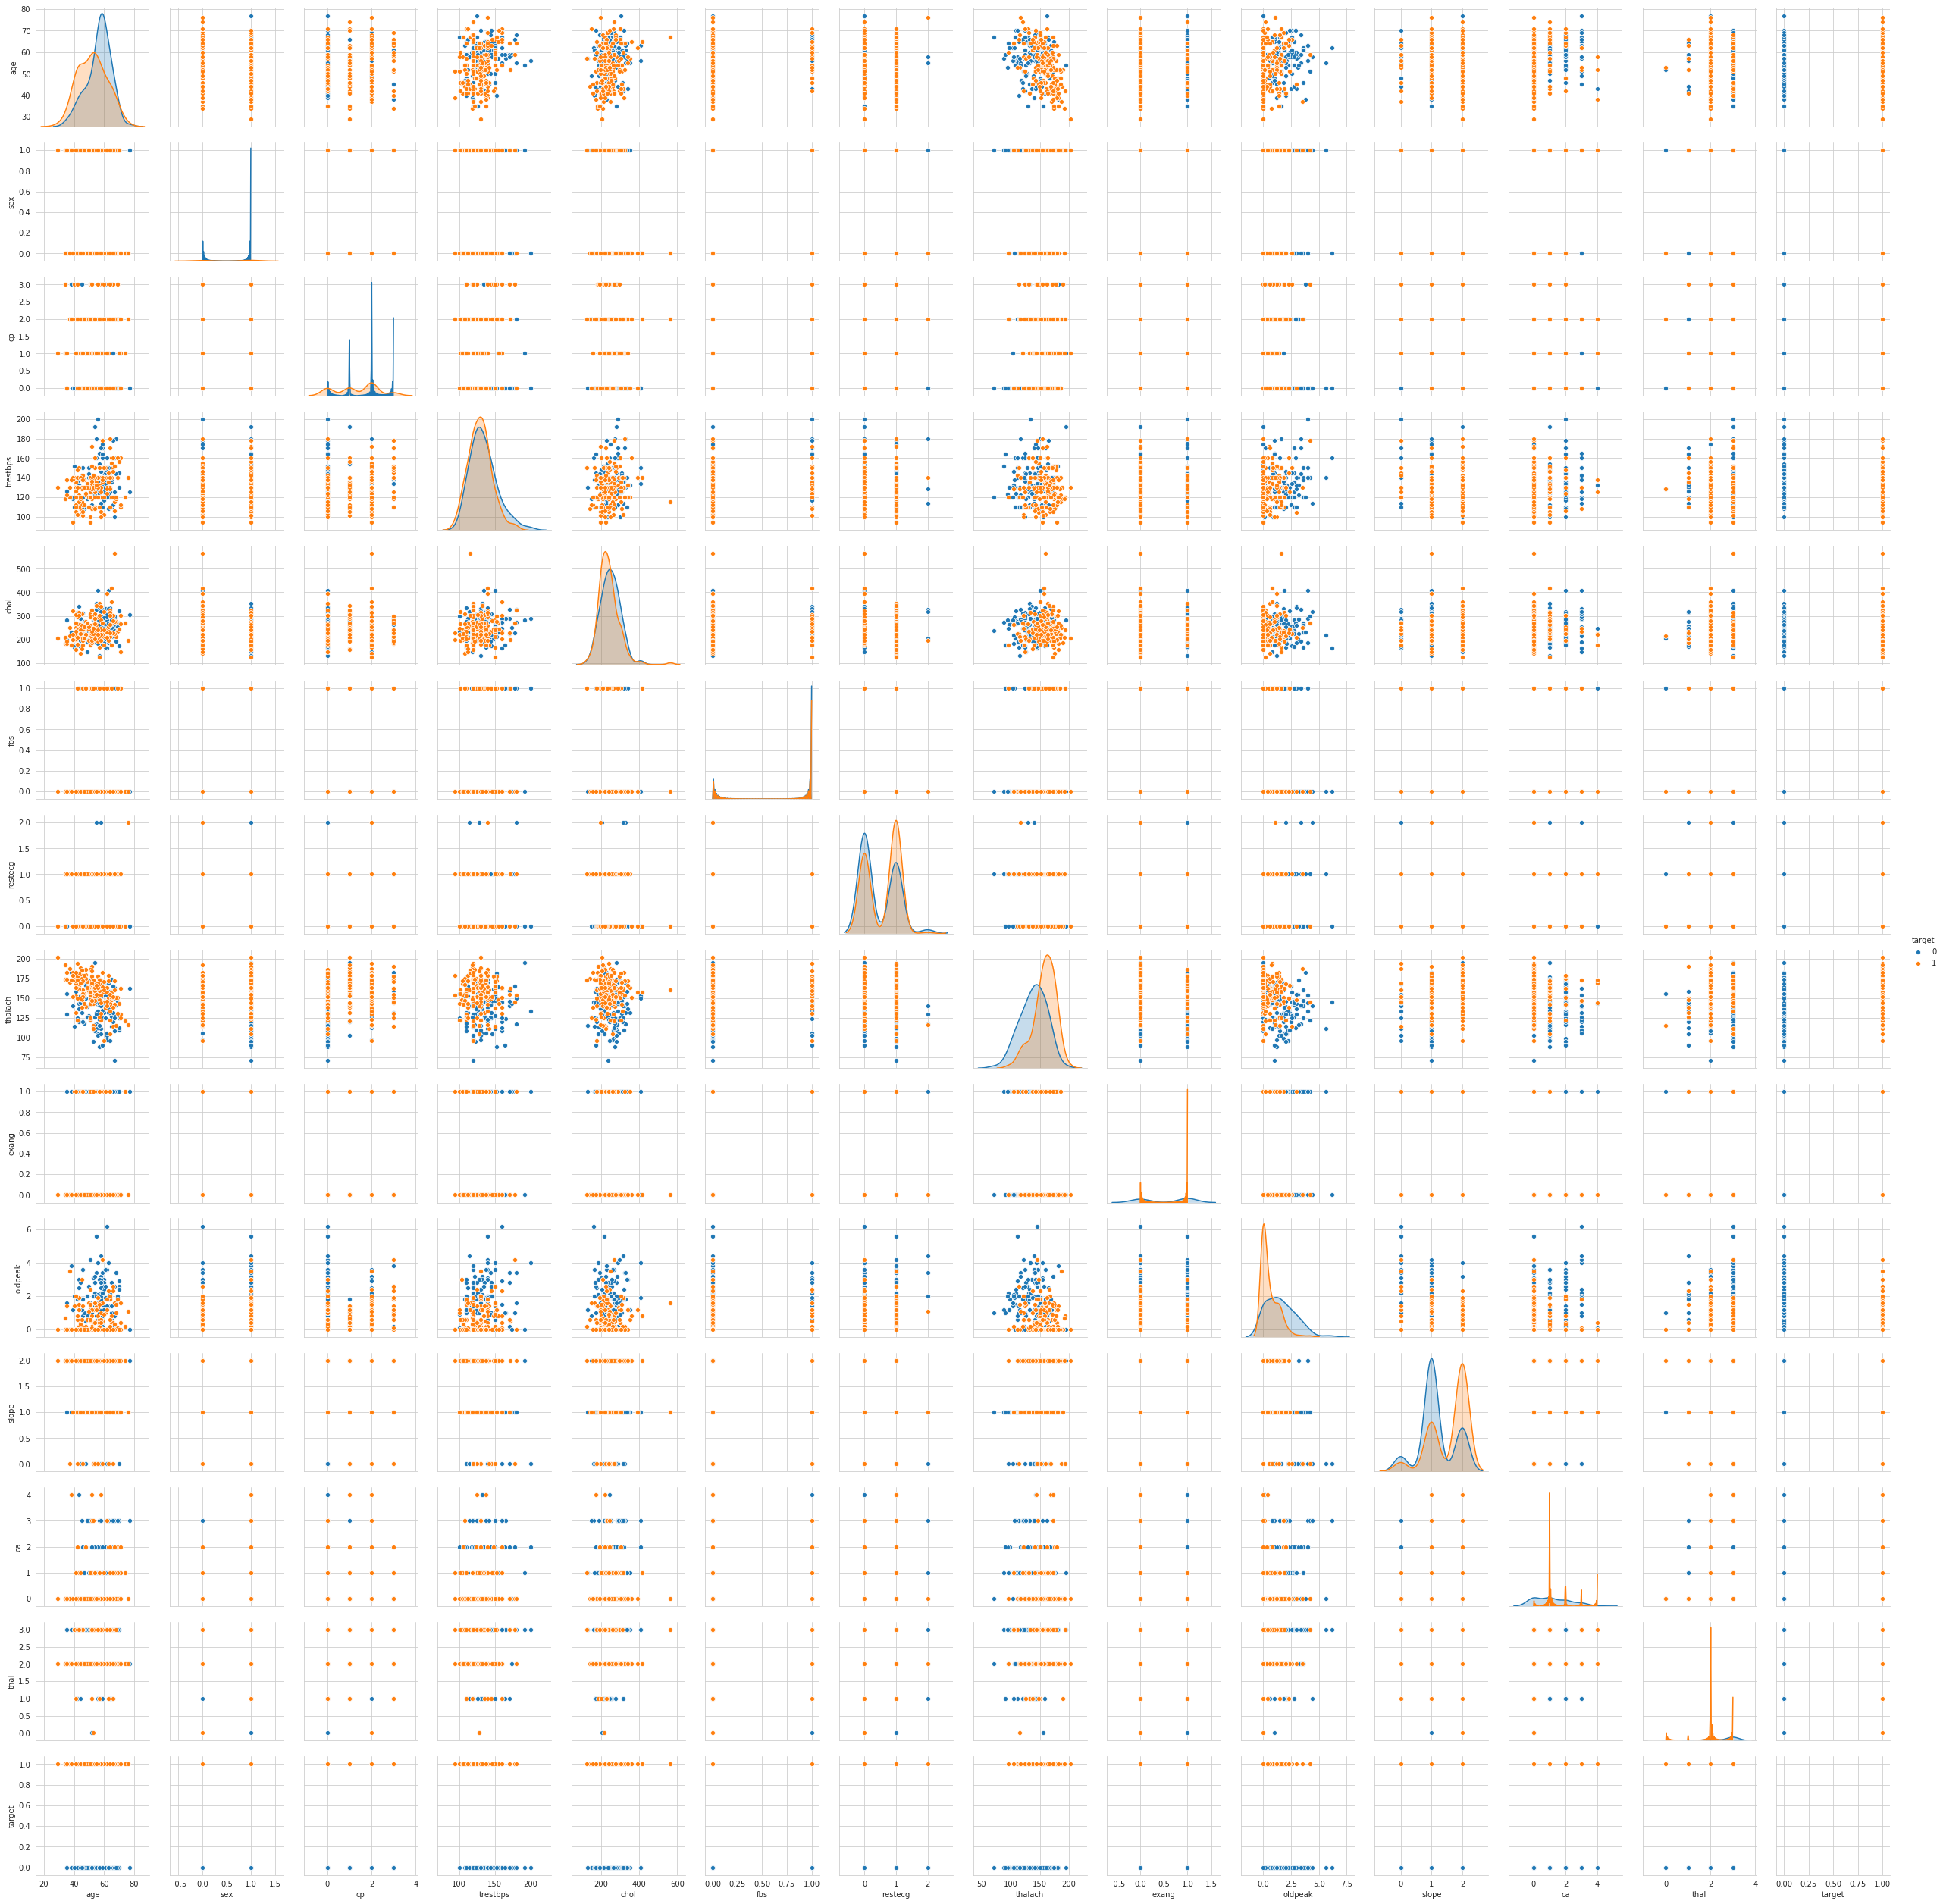

In [9]:
sns.pairplot(df,hue='target')

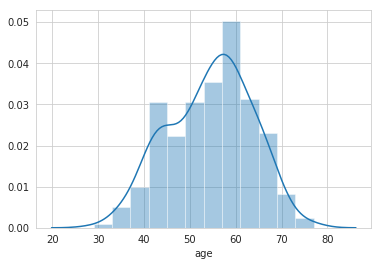

In [10]:
sns.distplot(df['age'],)

In [11]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [12]:

df['Age_Category']= pd.cut(df['age'],bins=list(np.arange(25, 85, 5)))

Text(0.5,1,'Age Distribution of Patients with -ve Heart Diagonsis')

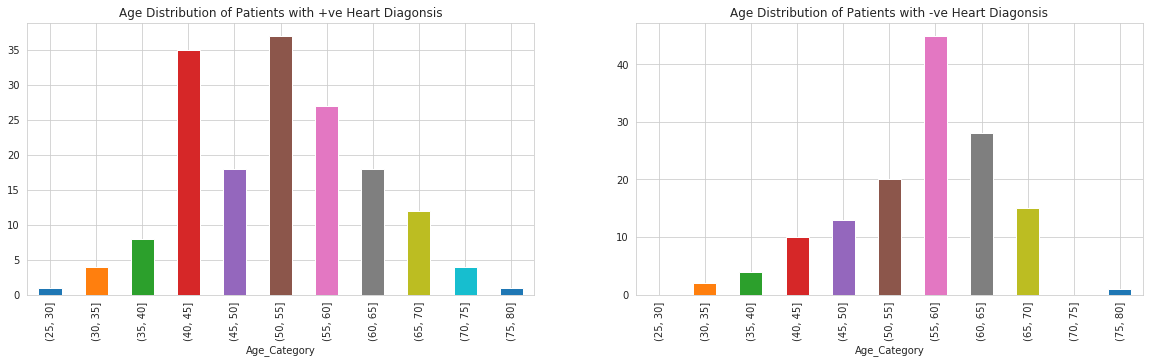

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(121)
df[df['target']==1].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with +ve Heart Diagonsis')

plt.subplot(122)
df[df['target']==0].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with -ve Heart Diagonsis')

In [14]:
df.nunique()

age              41
sex               2
cp                4
trestbps         49
chol            152
fbs               2
restecg           3
thalach          91
exang             2
oldpeak          40
slope             3
ca                5
thal              4
target            2
Age_Category     11
dtype: int64

Text(0,0.5,'Counts of Chest pain Type')

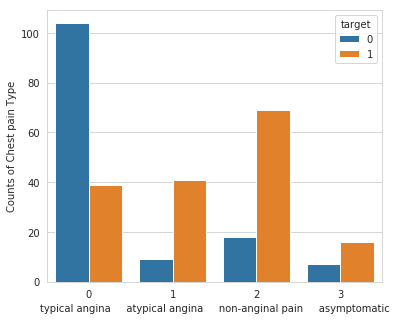

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(x='cp',data=df,hue='target')
plt.xlabel('typical angina     atypical angina     non-anginal pain     asymptomatic')
plt.ylabel('Counts of Chest pain Type')

Text(0,0.5,'Count')

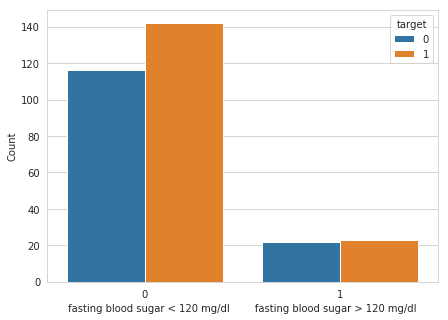

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x='fbs',data=df,hue='target')
plt.xlabel('fasting blood sugar < 120 mg/dl        fasting blood sugar > 120 mg/dl')
plt.ylabel('Count')

Text(0.5,1,'Exercise induced angina')

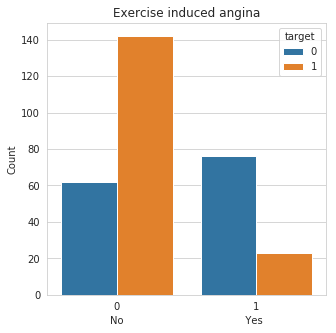

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='exang',data=df,hue='target')
plt.xlabel('No                                       Yes')
plt.ylabel('Count')
plt.title('Exercise induced angina')

In [18]:
df = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal','Age_Category'])


In [19]:
df.shape

(303, 42)

In [20]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'Age_Category_(25, 30]', 'Age_Category_(30, 35]',
       'Age_Category_(35, 40]', 'Age_Category_(40, 45]',
       'Age_Category_(45, 50]', 'Age_Category_(50, 55]',
       'Age_Category_(55, 60]', 'Age_Category_(60, 65]',
       'Age_Category_(65, 70]', 'Age_Category_(70, 75]',
       'Age_Category_(75, 80]'],
      dtype='object')

In [21]:
df.drop(['age'],axis=1,inplace=True)

In [22]:
df.shape

(303, 41)

In [23]:
y = df['target']
X = df.drop(['target'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)


In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = lr.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.94      0.93      0.93        54

   micro avg       0.93      0.93      0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [30]:
print(accuracy_score(y_test,y_pred))

0.93


In [31]:
print(confusion_matrix(y_test,y_pred))


[[43  3]
 [ 4 50]]


In [32]:
from sklearn.tree import DecisionTreeClassifier
trees = DecisionTreeClassifier()

In [33]:
trees.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_pred = trees.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.67      0.72      0.69        46
           1       0.75      0.70      0.72        54

   micro avg       0.71      0.71      0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

0.71
[[33 13]
 [16 38]]


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=750)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test) 

In [38]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.91      0.88        46
           1       0.92      0.87      0.90        54

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

0.89
[[42  4]
 [ 7 47]]
